<a href="https://colab.research.google.com/github/shuzuix127/Colab_analytics/blob/main/An%C3%A1lise_de_dados_KO(Coca_Cola).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

Aqui irei realizar uma análise de dados fornecidos pelo curso da EBAC sobre vendas e lucros da Coca Cola(KO)

Em primeira instância irei importar e instalar oque é preciso para fazer a análise dos dados


# Instalção

In [ ]:
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=4701f7e7b9495b03b76dff35ca40e379e4078f0c647f44f90996190ef44f2b46
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [ ]:
import wget
wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip',out="./dados.zip")

'./dados.zip'

Fazendo o download dos dados no arquivo compactado **dados.zip.**

In [ ]:
import zipfile
with zipfile.ZipFile("./dados.zip","r") as fp:
  fp.extractall("./dados")

Uma pasta foi criada com dois arquivos:


*   dow_jones_index.csv : arquivo com dados.
*   dow_jones_index.names : um arquivo com a descrição completa dos dados.



In [ ]:
import os
os.rename("dados/dow_jones_index.data","./dados/dow_jones_index.csv")

O Google Colab irá apresentar uma visualização bem legal dos dados.

In [ ]:
!pip install pandas


In [ ]:
import pandas as pd

Instalação e importação do pandas

In [ ]:
df=pd.read_csv("./dados/dow_jones_index.csv")

Criação da variável df("DataFrame") e atribuição da leitura do aruivo:

*   Vizualizar as primeiras linhas.




In [ ]:
df.head(n=10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149




1.   Vizualizar nome das colunas.




In [ ]:
df.columns.to_list()

['quarter',
 'stock',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'next_weeks_open',
 'next_weeks_close',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

Aqui vemos as Keys do arquivo



*   Verificando número de linhas e colunas.







In [ ]:
linhas,colunas =df.shape
print(f"O arquivo possui {linhas} linhas e {colunas} colunas")

O arquivo possui 750 linhas e 16 colunas


# Selecionando Valores

Agora vou selecionar os valores de abertura, fechamento, máximo e mínimo das ações da Coca Cola, listado na Dow Jones como KO:



*   Selecionando as linha do dataframe original **df** em que a coluna **stock** é igual a KO.


In [ ]:
df_KO = df[df["stock"]=="KO"]



*   Selecionando apenas colunas de datas e valores de ações.



In [ ]:
df_KO = df_KO[['date', 'open', 'high', 'low', 'close']]

As colunas possuem o caracter **$** que  sao do tipo de texto (object no pandas).

In [ ]:
df_KO.head(n=25)

,date,open,high,low,close
204,1/7/2011,$65.88,$65.88,$62.56,$62.92
205,1/14/2011,$62.70,$63.86,$62.56,$63.13
206,1/21/2011,$63.21,$63.92,$62.72,$62.77
207,1/28/2011,$62.87,$63.31,$62.14,$62.21
208,2/4/2011,$62.32,$63.48,$61.89,$62.56
209,2/11/2011,$62.67,$64.75,$62.32,$63.57
210,2/18/2011,$63.67,$64.72,$62.55,$64.55
211,2/25/2011,$63.36,$64.40,$63.33,$64.31
212,3/4/2011,$64.17,$65.87,$63.86,$65.21
213,3/11/2011,$65.32,$65.84,$64.47,$64.81


In [ ]:
df_KO.dtypes

,0
date,object
open,object
high,object
low,object
close,object


Vou limpar as colunas com método apply. A função lambda(Anônima) remove o caracter $ e faz a conversão do tipo de str para float.

In [ ]:
for col in ['open', 'high', 'low', 'close']:
  df_KO[col]= df_KO[col].apply(lambda value:float(str(value).split(sep='$')[-1])
    if isinstance(value, str) else float(value))

In [ ]:
df_KO.head(n=25)

,date,open,high,low,close
204,1/7/2011,65.88,65.88,62.56,62.92
205,1/14/2011,62.70,63.86,62.56,63.13
206,1/21/2011,63.21,63.92,62.72,62.77
207,1/28/2011,62.87,63.31,62.14,62.21
208,2/4/2011,62.32,63.48,61.89,62.56
209,2/11/2011,62.67,64.75,62.32,63.57
210,2/18/2011,63.67,64.72,62.55,64.55
211,2/25/2011,63.36,64.40,63.33,64.31
212,3/4/2011,64.17,65.87,63.86,65.21
213,3/11/2011,65.32,65.84,64.47,64.81


In [ ]:
df_KO.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64


# Vizualização

 Para visualizar os dados, vou utilizar o pacote seaborn

In [ ]:
!pip install seaborn



*  Irei importa-lo com um apelido(alias) assim como no pandas.



In [ ]:
import seaborn as sns



*   Vou visualizar o os valores de abertura das ações ao longo do tempo.



/tmp/ipython-input-2100473203.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(labels=df_KO['date'], rotation=90)


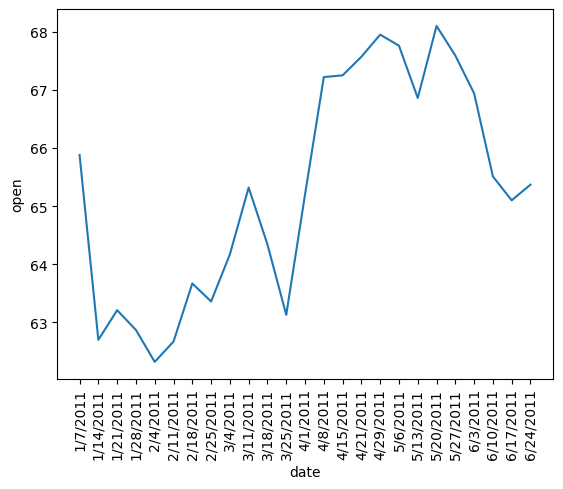

In [ ]:
plot = sns.lineplot(x="date", y="open", data=df_KO)
_ = plot.set_xticklabels(labels=df_KO['date'], rotation=90)



*   Vou também visualizar o os valores de fechamento das ações ao longo do tempo.



/tmp/ipython-input-1063765132.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(labels=df_KO['date'], rotation=90)


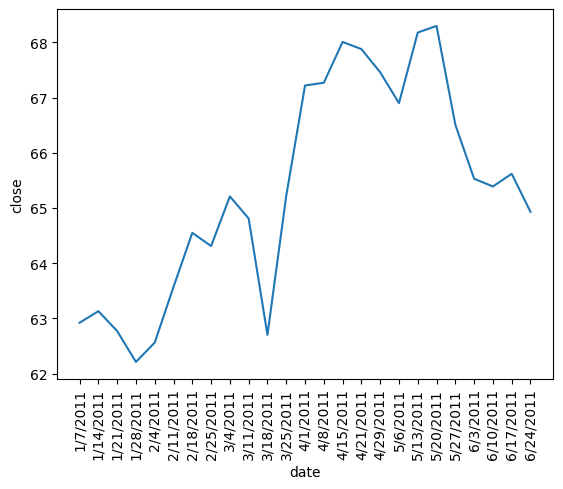

In [ ]:
plot = sns.lineplot(x="date", y="close", data=df_KO)
_ = plot.set_xticklabels(labels=df_KO['date'], rotation=90)



*   Para facilitar  comparação, vo visualizar os quatro valores no mesmo gráfico.



/tmp/ipython-input-142176028.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(labels=df_KO['date'], rotation=90)


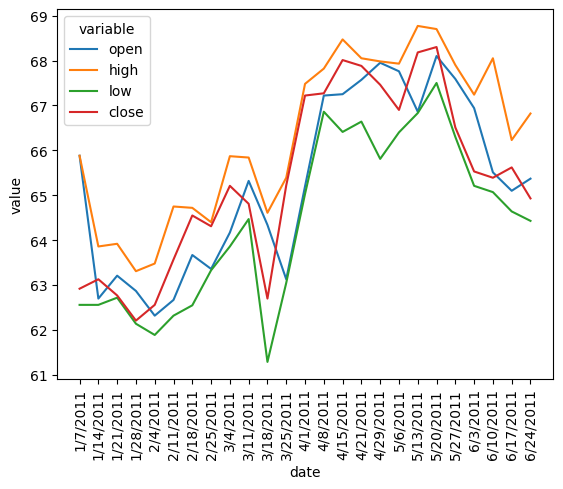

In [ ]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_KO, ['date']))
_ = plot.set_xticklabels(labels=df_KO['date'], rotation=90)



*   Vou salvar o gráfico numa figura.



In [ ]:
plot.figure.savefig("./KO.png")

# Análise Final

*Como podemos ver, no dia 18/03/2011 teve a maior queda entre os outros valores e a data pode coincidir com notícias regionais ou problemas pontuais em algumas unidades de produção.*

*No final de março teve um crescimento significativo em todos os gráficos depois da queda do dia 18.*

*De janeiro até maio, é possível ver uma clara tendência de valorização das ações. O preço saiu de aproximadamente 63 no início de janeiro e atingiu aproximadamente 68 em maio.*

*E depois de seus baixos e maxímos houve uma clara correção e concistência.*


*Este comportamento sugere que a Coca-Cola teve um primeiro semestre forte em 2011, mas com alguns momentos de volatilidade que podem estar relacionados a fatores macroeconômicos ou específicos da empresa no período.*